# Linear Discriminant Analysis

* Another Dimensionality Reduction technique like PCA/SVD
* Different from PCA in that it uses the information of the class labels
* It finds the vector/axis (called the linear discriminant vector) that 
  * maximizes the distance between the projected means of each class AND 
  * minimizes the sum of the projected scatter from each mean (i.e., variance), aka, *Fisher LDA objective*
* Like PCA/SVD, it can also find the 2nd, 3rd, ... vectors/axes 
* Read DMAA Ch.20 for the Mathematical derivation
* sklearn: [LDA](http://scikit-learn.org/stable/modules/lda_qda.html)

The figures here use an example of 2D data with binary class labels. The method can be generalize to multiple classes.

Non-LDA vector | LDA vector
-|-
<img src="https://lipyeow.github.io/cis705f18/morea/linearalgebra/lda1.png" alt="non-lda vector" width="400">|<img src="https://lipyeow.github.io/cis705f18/morea/linearalgebra/lda2.png" alt="lda vector" width="400">

In [18]:
import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

# reads a csv file ignoring the first header row
# convert all fields to int
# returns a numpy array
def readCSV(fname):
    hdr=[]
    with open(fname, newline='') as csvfile:
        csvdata = csv.reader(csvfile, delimiter=',')
        i=0
        data=[]
        for row in csvdata:
            if i>0:
                data.append([int(col) for col in row])
            elif i==0:
                hdr=row
                print([x for x in enumerate(hdr)])
            i = i+1
    return hdr, np.asarray(data)

hdr, fcdata = readCSV('train.csv')

[(0, 'Id'), (1, 'Elevation'), (2, 'Aspect'), (3, 'Slope'), (4, 'Horizontal_Distance_To_Hydrology'), (5, 'Vertical_Distance_To_Hydrology'), (6, 'Horizontal_Distance_To_Roadways'), (7, 'Hillshade_9am'), (8, 'Hillshade_Noon'), (9, 'Hillshade_3pm'), (10, 'Horizontal_Distance_To_Fire_Points'), (11, 'Wilderness_Area1'), (12, 'Wilderness_Area2'), (13, 'Wilderness_Area3'), (14, 'Wilderness_Area4'), (15, 'Soil_Type1'), (16, 'Soil_Type2'), (17, 'Soil_Type3'), (18, 'Soil_Type4'), (19, 'Soil_Type5'), (20, 'Soil_Type6'), (21, 'Soil_Type7'), (22, 'Soil_Type8'), (23, 'Soil_Type9'), (24, 'Soil_Type10'), (25, 'Soil_Type11'), (26, 'Soil_Type12'), (27, 'Soil_Type13'), (28, 'Soil_Type14'), (29, 'Soil_Type15'), (30, 'Soil_Type16'), (31, 'Soil_Type17'), (32, 'Soil_Type18'), (33, 'Soil_Type19'), (34, 'Soil_Type20'), (35, 'Soil_Type21'), (36, 'Soil_Type22'), (37, 'Soil_Type23'), (38, 'Soil_Type24'), (39, 'Soil_Type25'), (40, 'Soil_Type26'), (41, 'Soil_Type27'), (42, 'Soil_Type28'), (43, 'Soil_Type29'), (44, '

## Find the dimension-reduced data points using PCA & LDA

In [29]:
# take a random sample of the data to plot
subsetsize = 2000
datasubset = fcdata[np.random.choice(fcdata.shape[0],subsetsize,replace=False),:]

# ignore col #0 and the binary encoded wilderness and soiltype columns #11:
dataX = datasubset[:,1:11]
dataY = datasubset[:,55]

# target dimensions 
tgtdim = 2

pcamodel = PCA(n_components=tgtdim)
pcamodel.fit(dataX)

print("Singular values = ")
print(pcamodel.singular_values_)

lda = LinearDiscriminantAnalysis(n_components=tgtdim)
lda.fit(dataX, dataY)


oldX = fcdata[:,1:11]
pcaX = pcamodel.transform(oldX)
ldaX = lda.transform(oldX)
origY = fcdata[:,55]

# sanity check
print(oldX[0,:])
print(pcaX[0,:])
print(ldaX[0,:])



Singular values = 
[ 67708.03909494  37055.11242544]
[2596   51    3  258    0  510  221  232  148 6279]
[ 1415.04600165  4735.64387318]
[-0.46528832 -0.72706484]


## Let's plot the dimension-reduced points 

Does it fit our intuition?

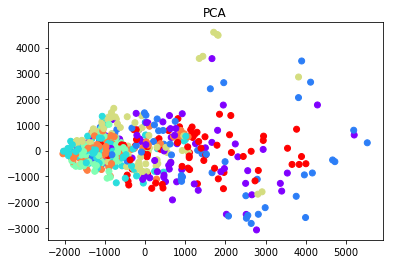

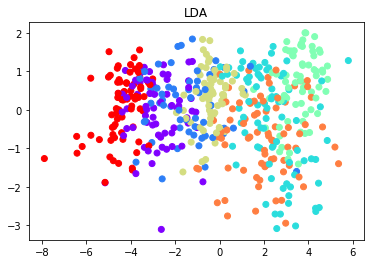

In [23]:
# plot using a smaller sample of the data so that it won't look so cluttered
# this is cute pythonic way of doing random sampling via indices
# generate indices of random sample 
rs = np.random.choice(fcdata.shape[0],500,replace=False)

# create a set of colors for the 7 forest cover types
colors = matplotlib.cm.rainbow(np.linspace(0, 1, 7))
#print(colors)
# assign the colors for the fc in the data set 
cs = [colors[y-1] for y in origY[rs]]

#plt.rcParams['figure.figsize'] = [10, 8]

plt.figure()
plt.scatter(pcaX[rs,0],pcaX[rs,1],color=cs)
plt.title("PCA")

plt.figure()
plt.scatter(ldaX[rs,0],ldaX[rs,1],color=cs)
plt.title("LDA")

plt.show()

## Does it translate to better classification performance?

The sklearn LDA model also support prediction via the Bayes rule assuming a Normal/Gaussian distribution over the means.

In [30]:
from sklearn import tree

model1 = tree.DecisionTreeClassifier()
model2 = tree.DecisionTreeClassifier()
model3 = tree.DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score
print("\nCross Validation for DT on old X: ")
print(cross_val_score(model1, oldX, origY, cv=5))

print("\nCross Validation for DT on pca X: ")
print(cross_val_score(model2, pcaX, origY, cv=5))

print("\nCross Validation for DT on lda X: ")
print(cross_val_score(model3, ldaX, origY, cv=5))

print("\nCross Validation for LDA-Bayesian on lda X: ")
print(cross_val_score(lda, ldaX, origY, cv=5))


Cross Validation for DT on old X: 
[ 0.62334656  0.65674603  0.64980159  0.64252646  0.74239418]

Cross Validation for DT on pca X: 
[ 0.37599206  0.29794974  0.27083333  0.28670635  0.3452381 ]

Cross Validation for DT on lda X: 
[ 0.52380952  0.52414021  0.5162037   0.51157407  0.54828042]

Cross Validation for LDA-Bayesian on lda X: 
[ 0.5707672   0.61541005  0.59424603  0.56117725  0.5978836 ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


When does LDA dimensionality reduction "shine"?

## Application: Eigenfaces vs Fisherfaces

1997 paper [pdf](https://cseweb.ucsd.edu/classes/wi14/cse152-a/fisherface-pami97.pdf)

![slide](https://lipyeow.github.io/cis705f18/morea/linearalgebra/eigenface1.png)


![slide](https://lipyeow.github.io/cis705f18/morea/linearalgebra/eigenface2.png)